# HW 1
**Eli Schwat**  
**CEWA 568**  
**Spring 2023**


## Water and States of Matter

For this week's homework, we will pretend we are in very controlled laboratory conditions. If you dislike python, these questions can all be answered with pencil, paper, and a calculator, but you may want to use this exercise as a chance to practice your programming skills.

In [13]:
from IPython import display
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity

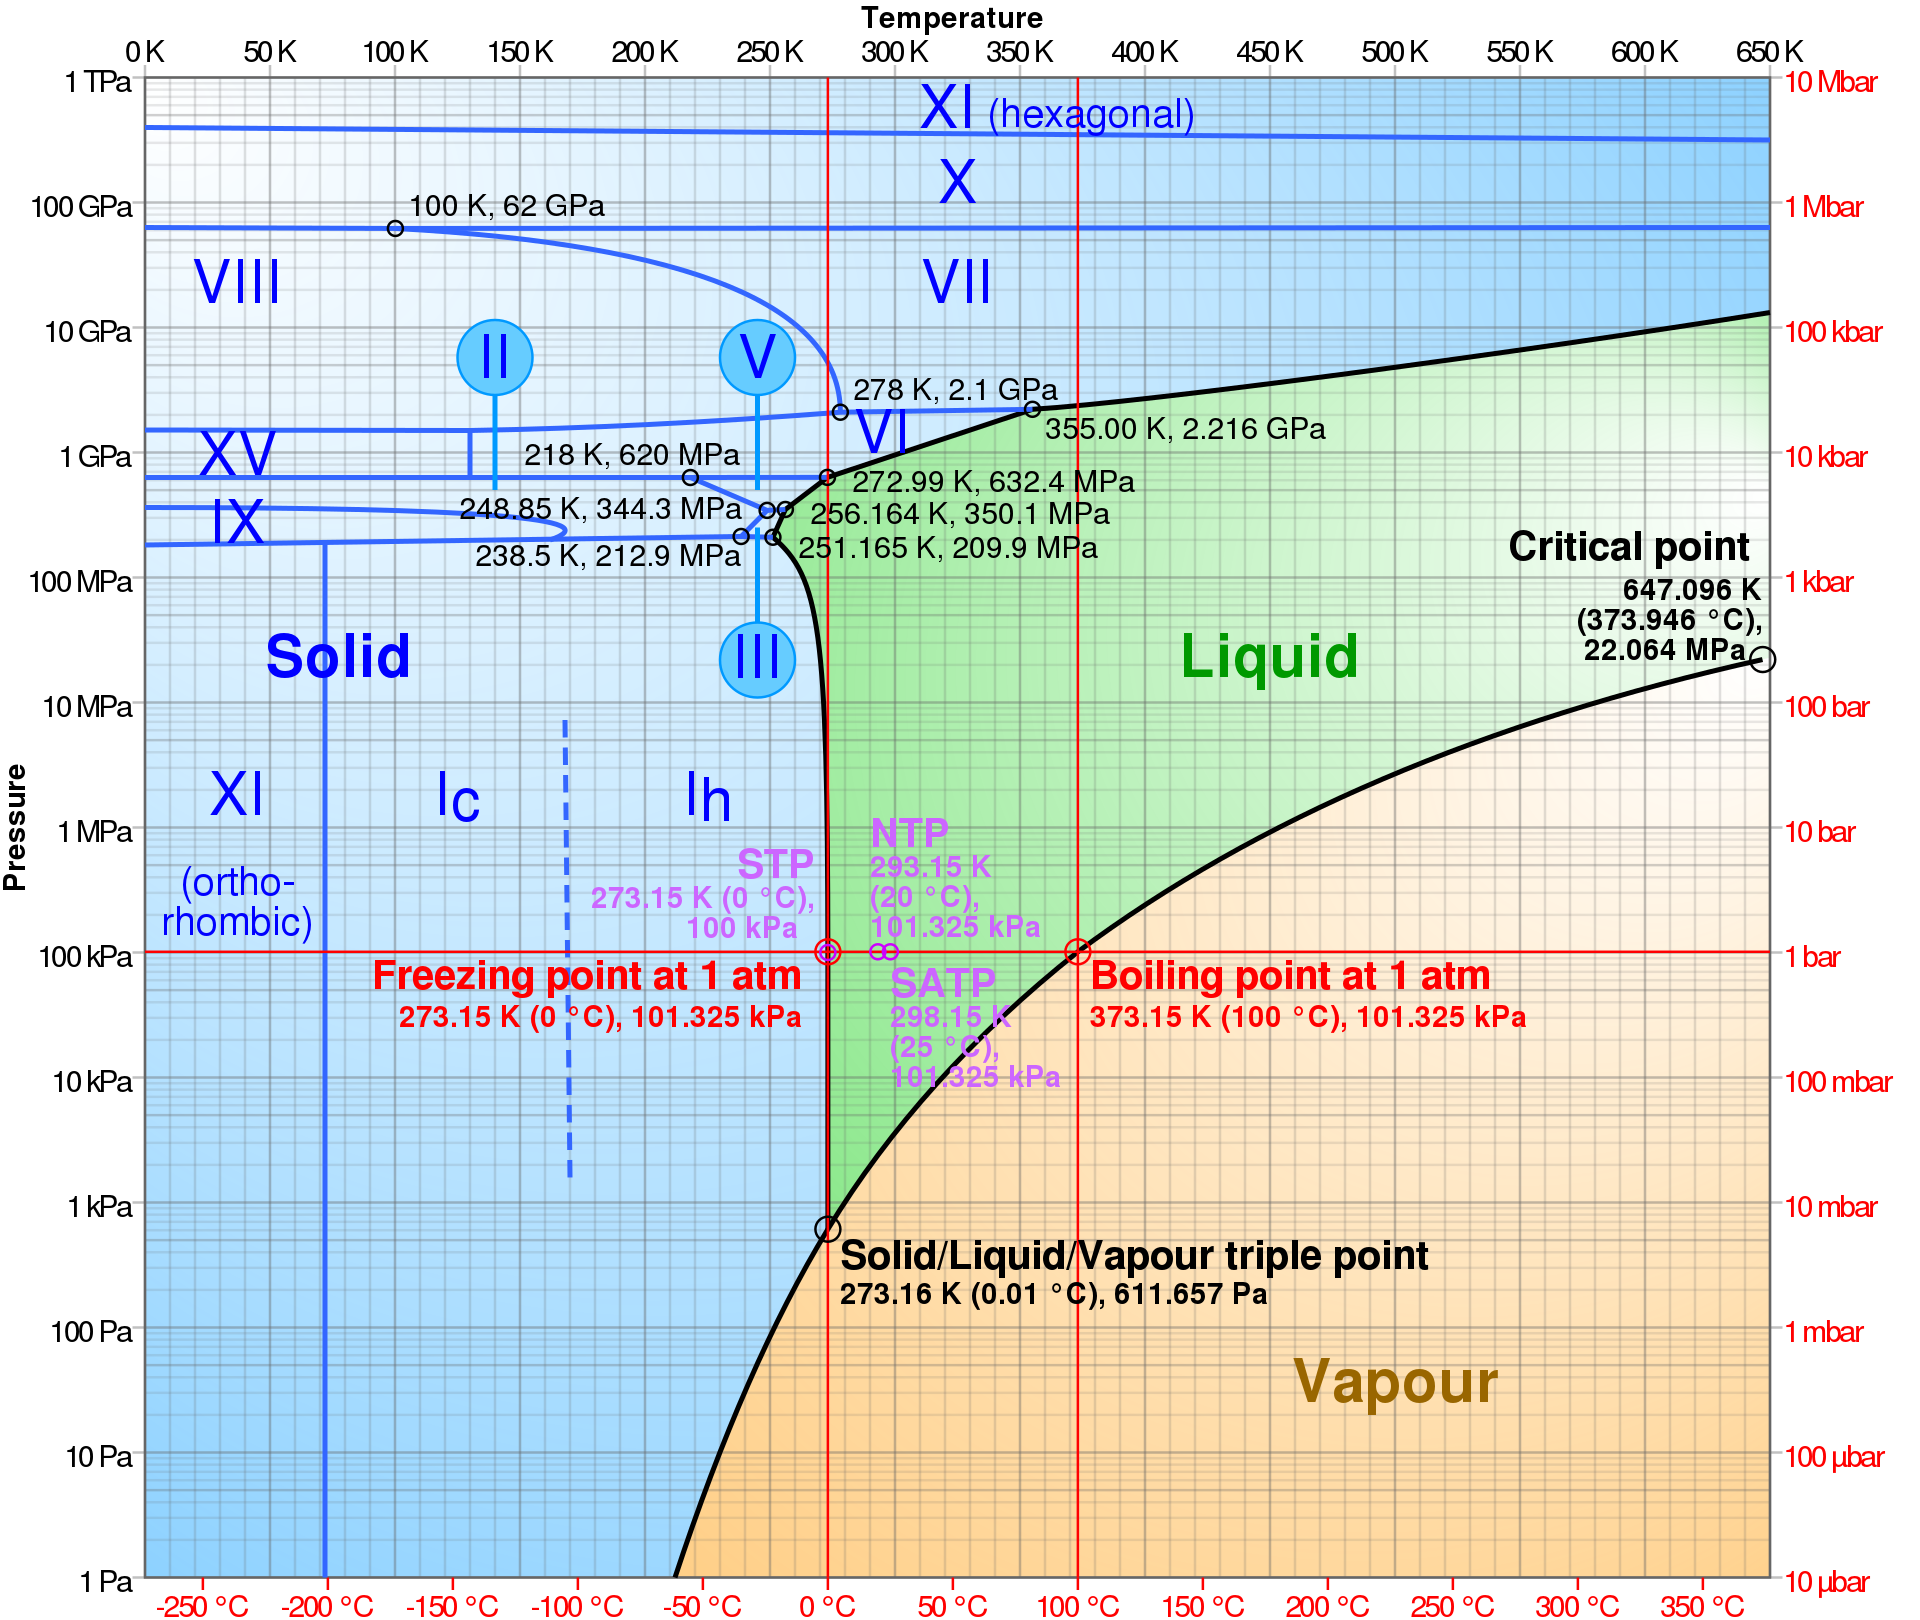

In [14]:
display.Image("../images/Phase_diagram_of_water.svg.png", width=800)

### A. 

**Imagine you have a 1 cubic centimeter block of ice at -10 degrees C and 1 atm of pressure. Calculate the amount of energy required to melt all of the ice. (Note that you will have to warm it to 0 degrees C before you begin melting it.)**

To calculate the energy required for this process we add:
* energy it takes to raise 1 cm^3 water from -10 to 0˚C, using the specific heat of water
* energy it takes to melt 1 cm^3 water, using the latent heat of fusion

First lets define some useful physical constants 

In [15]:
# First, let's consider the basic thermodynamics of heating water, ice, and air, without phase changes.
# The following are defined at 1 atmosphere of pressure.
specific_heat_units = ureg.kilojoule / ureg.degree_Kelvin / ureg.kilogram
c_p_water = Q_(4.2, specific_heat_units) 
c_p_ice = Q_(2.1, specific_heat_units) 
c_p_air = Q_(1.0, specific_heat_units)

latent_heat_units = ureg.kilojoule / ureg.kilogram
# latent heat of fusion for the ice-water transition
L_f = Q_(334, latent_heat_units)
# latent heat of vaporization for the water-vapor transition (evaporation)
L_v = Q_(2256, latent_heat_units)
# latent heat of vaporization for the ice-vapor transition (sublimation)
L_s = Q_(L_f + L_v, latent_heat_units)

Note that specific and latent heat are in units per mass, so we have to find the mass of the specified 1 cm^3 of water. 1 cm^3 of water is 1 g or .001 kg of water.


In [16]:
mass_of_water = 0.001 * ureg.kilogram # kg
temp_change = 10 * ureg.degree_Kelvin

In [17]:
energy_to_raise_water = c_p_water * mass_of_water * temp_change
energy_to_raise_water

0.04200000000000001 <Unit('kilojoule')>

In [18]:
energy_to_melt_water = L_f * mass_of_water
energy_to_melt_water

0.334 <Unit('kilojoule')>

In [19]:
energy_to_raise_water + energy_to_melt_water

0.376 <Unit('kilojoule')>

It takes 0.376 kJ to complete the process described in A.

### B. 
**Now, consider that same block of ice at -10 degrees C and 1 atm of pressure. Calculate the amount of energy required to sublimate all of the ice. (Note that you do not need to warm the ice to sublimate it.)**


In [20]:
energy_to_sublimate_water = L_s * mass_of_water
energy_to_sublimate_water

2.59 <Unit('kilojoule')>

### C. 
**Repeat the calculations above, but imagine you are high in the mountains at 0.5 atm of pressure. What changes?**

At the range of pressures 0.5 - 1 atm, the specific heat of water does not vary much, so we assume the constant value specified above. At 0.5 atm of pressure, the latent heat of fusion does not change, but the latent of sublimation decreases because the latent heat of vaporization decreases. Statistically, its "easier" for molecules to leave the continumm (ice or liquid) water surface.

Problem A does not need to be recalculated. Problem B does. We define a new latent heat of vaporization, which we found for the liquid-vapor (evaporation) transition here

https://www.thermexcel.com/english/tables/vap_eau.htm

In [21]:
# latent heat of vaporization for the water-vapor transition (evaporation)
L_v_0_5atm = Q_(2305.42, latent_heat_units)
# latent heat of vaporization for the ice-vapor transition (sublimation)
L_s_0_5atm = Q_(L_f + L_v_0_5atm, latent_heat_units)

It isn't intuitive that the latent heat of evaporation increases with decreasing pressure, in fact in contradicts my statistical explanation above. There is an explanation that makes sense though - as pressure increases, a critical point is reached where the difference between liquid and vapor no longer exists, in which case latent heat of evaporation goes to zero.

I think this topic gets into some deep thermodynamics that I am not familiar with, so we will use the table I found above for now.

In [22]:
L_v, L_v_0_5atm

(2256 <Unit('kilojoule / kilogram')>, 2305.42 <Unit('kilojoule / kilogram')>)

In [23]:
energy_to_sublimate_water_0_5atm = L_s_0_5atm * mass_of_water
energy_to_sublimate_water_0_5atm

2.6394200000000003 <Unit('kilojoule')>

In [24]:
energy_to_sublimate_water_0_5atm - energy_to_sublimate_water

0.049420000000000464 <Unit('kilojoule')>

We find it takes ~0.05 kJ more energy to sublimate water at 0.5atm than at 1.0 atm.


### D. 

**We know that cold snow is primarily a mixture of ice and air. Consider no phase changes and temperatures between -15 degrees and -5 degrees C. Imagine that no interactions occur between the ice and air in the snow matrix. How does the energy required to heat the mixture those 10 degrees change as the fractions of ice vs. air change in the total mixture?**

The energy required only changes because the ice/air fraction modifies how much water there is to be "phase changed".

### E. 

**I argue that sublimation saves the snowpack more than it reduces it. Why would I say this? Do you agree or disagree? Use the specific and latent heats in lab 1-2 to make your argument.**



I agree, at least when we only consider the thermodynamics of the a snowpack system isolated from the surrounding environment (i.e., no interactions between the ground below and atmosphere above).

It takes ~10x more energy to sublimate frozen water than it does to melt liquid (latent heat of vaporization is greater than the latent heat of fusion). 

In [11]:
L_f, L_s, L_f < L_s

(334 <Unit('kilojoule / kilogram')>, 2590 <Unit('kilojoule / kilogram')>, True)

When water sublimates away from the snowpack, heat is removed and the temperature of the snowpack decreases. This process is relatively efficient at removing heat from the snowpack and sublimation therefore makes melting less likely, by decreasing the snowpack temperature. Per unit mass, sublimation will result in a larger decrease to snowpack temperature than melting, meaning sublimation more than melting protects the snowpack.

In [12]:
c_p_ice, c_p_water, c_p_air

(2.1 <Unit('kilojoule / kelvin / kilogram')>,
 4.2 <Unit('kilojoule / kelvin / kilogram')>,
 1.0 <Unit('kilojoule / kelvin / kilogram')>)

Because the specific heat of water vapor is much less than that of liquid water, per unit mass and unit degree difference across a snowpack-water or snowpack-water vapor interface, liquid water has a greater potential to increase the temperature of the snowpack. Therefore, a snowpack-water interface is more likely to lead to melt of the snowpack than a snowpack-water vapor interface.